### 데이터 시각화하기
만들어 볼 시각화 그래프: hist, barplot, boxplot, violinplot, countplot, pie, heatmap, scatterplot

사용할 데이터 파일: BP_data.csv   
- 열 목록: [Patient_Number, Blood_Pressure_Abnormality, Level_of_Hemoglobin, Genetic_Pedigree_Coefficient, Age, BMI, Sex, Pregnancy, Smoking, Physical_activity, salt_content_in_the_diet, alcohol_consumption_per_day, Level_of_Stress, Chronic_kidney_disease, Adrenal_and_thyroid_disorders]   
    - 수치형(continuous, 연속된 값 범위 내 하나의 값을 가진, 예: 나이) 데이터: Level_of_Hemoglobin, Genetic_Pedigree_Coefficient, Age, BMI, alcohol_consumption_per_day, Level_of_Stress   
    - 범주형(categorical, 여러 카테고리 중 하나의 값을 가진, 예: 성별) 데이터: Blood_Pressure_Abnormality, Sex, Pregnancy, Smoking, Physical_activity, salt_content_in_the_diet, Chronic_kidney_disease, Adrenal_and_thyroid_disorders
    - Patient_Number는 행 식별을 위한 데이터이므로 시각화에 사용할 필요 X

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('../BP_data.csv')

print(df.columns)
df.head()

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


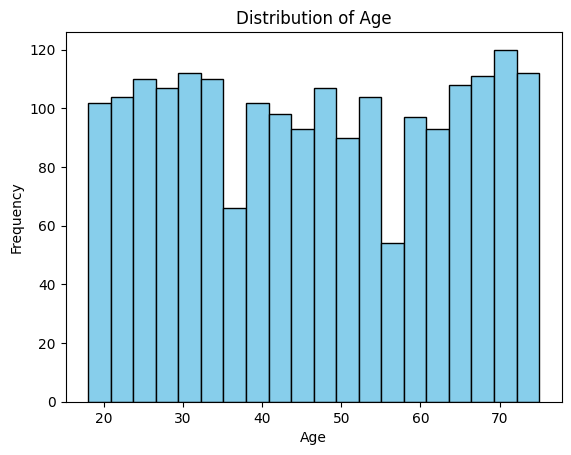

In [29]:
# 1. Hist: 히스토그램
# 수치형 데이터 하나 분포 보기

graph_column = 'Age' # 그래프를 만들 열 이름 입력

plt.hist(df[graph_column], bins=20, color='skyblue', edgecolor='black')
    # bins: 히스토그램 막대 수. 많을수록 세분화해 시각화.
plt.title('Distribution of ' + graph_column)
plt.xlabel(graph_column)
plt.ylabel('Frequency')
plt.show()

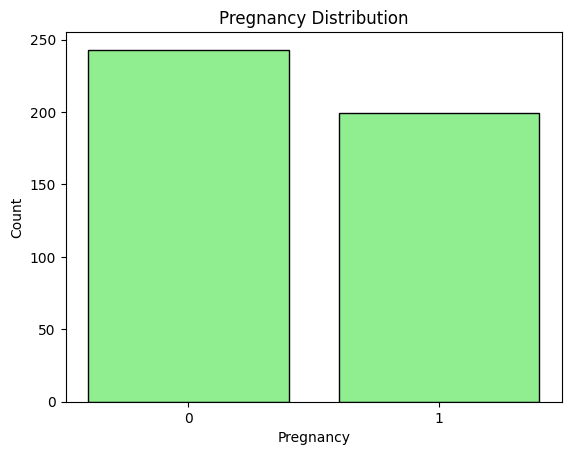

In [ ]:
# 2. Barplot: 바 플롯(= 막대 그래프)
# 범주형 데이터의 비율 보기

graph_column = 'Pregnancy' # 그래프를 만들 열 이름 입력

sex_counts = df[graph_column].value_counts()

plt.bar(sex_counts.index, sex_counts.values, color='lightgreen', edgecolor='black')
plt.title(graph_column + ' Distribution')
plt.xlabel(graph_column)
plt.ylabel('Count')
plt.xticks([0, 1]) # x축 눈금에 표시할 값 지정
plt.show()

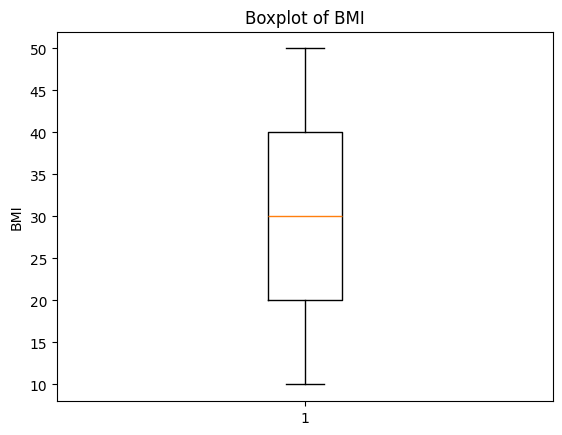

In [ ]:
# 3. Boxplot: 박스플롯
# 수치형 데이터 분포, 이상치 보기


graph_column = 'BMI' # 그래프를 만들 열 이름 입력

plt.boxplot(df[graph_column].dropna())
plt.title('Boxplot of ' + graph_column)
plt.ylabel(graph_column)
plt.show()

C:\Users\jt341\AppData\Local\Temp\ipykernel_18080\4237017877.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_to_use, y=column_to_use2, data=df, palette='pastel')


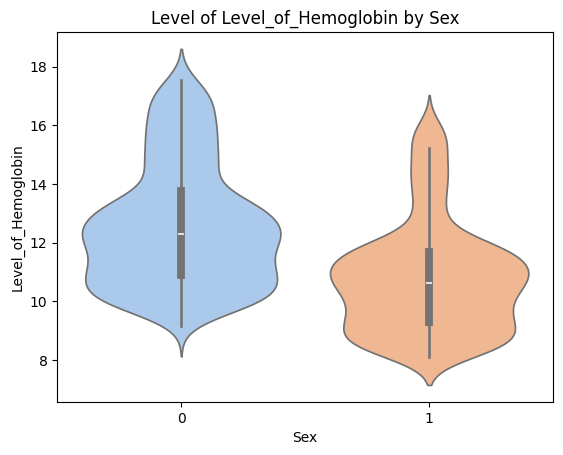

In [ ]:
# 4. Violinplot: 바이올린플롯
# 범주형 데이터의 각 카테고리별 수치형 데이터 분포(예: Sex별 Level_of_Hemoglobin)
# *plt 대신 seaborn 사용 - 더 깔끔하므로

graph_column = 'Sex'
graph_column2 = 'Level_of_Hemoglobin'

sns.violinplot(x=graph_column, y=graph_column2, data=df, palette='pastel')
plt.title('Level of ' + graph_column2 + ' by ' + graph_column)
plt.xlabel(graph_column)
plt.ylabel(graph_column2)
plt.show()

C:\Users\jt341\AppData\Local\Temp\ipykernel_18080\305083334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=graph_column, data=df, palette='Set2')


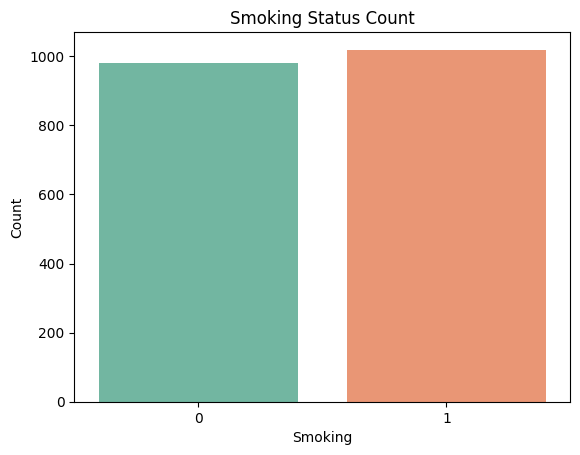

In [ ]:
# 5. Countplot: 카운트플롯
# 범주형 데이터 개수 세기

graph_column = 'Smoking'

sns.countplot(x=graph_column, data=df, palette='Set2')
plt.title(graph_column + ' Status Count')
plt.xlabel(graph_column)
plt.ylabel('Count')
plt.show()

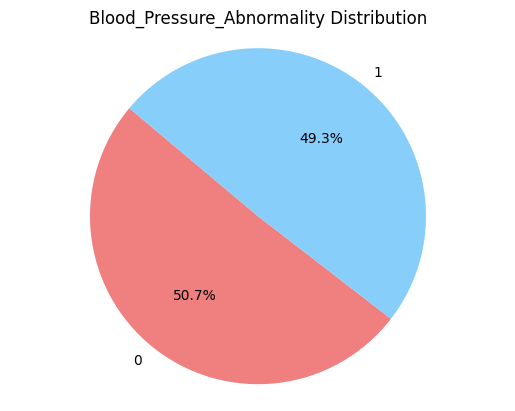

In [34]:
# 6. Pie Chart: 파이 차트(= 원 그래프)
# 범주형 데이터의 각 카테고리의 비율

graph_column = 'Blood_Pressure_Abnormality'

bp_counts = df[graph_column].value_counts()

plt.pie(bp_counts.values, labels=bp_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title(graph_column + ' Distribution')
plt.axis('equal')  # 원이 동그랗게
plt.show()

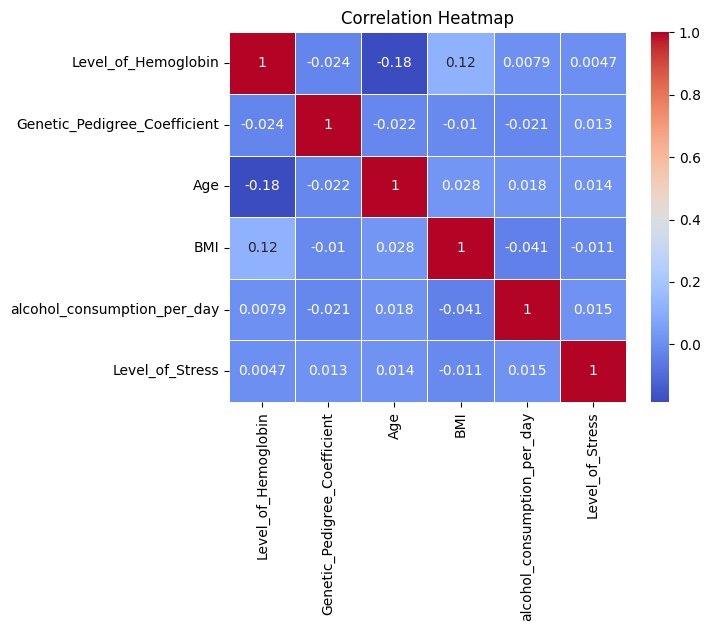

In [35]:
# 7. Heatmap: 히트맵
# 수치형 변수들 간 상관관계

corr = df[['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'alcohol_consumption_per_day', 'Level_of_Stress']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

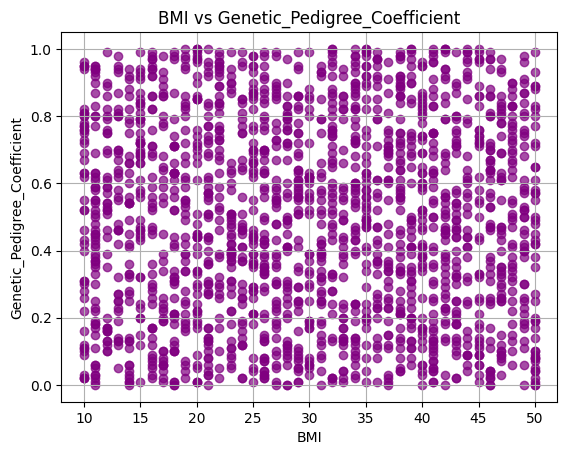

In [37]:
# 8. Scatterplot: 산점도
# 두 수치형 변수의 값들을 공간에 두고 관계 파악

graph_column = 'BMI'
graph_column2 = 'Genetic_Pedigree_Coefficient'

plt.scatter(df[graph_column], df[graph_column2], color='purple', alpha=0.7)
plt.title(graph_column + ' vs ' + graph_column2)
plt.xlabel(graph_column)
plt.ylabel(graph_column2)
plt.grid(True)
plt.show()